In [439]:
# cardpole w/ use of env information - position, velocity and so on
import json
import gym
import numpy as np
import importlib
import torch
import torch.nn as nn

# my modules
import network
import agent
importlib.reload(network)
importlib.reload(agent)

<module 'agent' from '/Users/mgaiduk/dev/repos/reinforcement_learning/03_py_cartpole/agent.py'>

In [523]:
t = 0
episodes = []
ag = agent.Agent(exploration_prob_decay_steps=100_000, lr=0.01)
flag = False

env = gym.make('CartPole-v1').unwrapped
observation, info = env.reset(return_info=True)
for epoch in range(100_000):
    while True:
        # action = env.action_space.sample()
        action = ag.select_action(observation)
        observation, reward, done, info = env.step(action)
        ag.consume_event(observation, reward, done)
        if done:
            observation, info = env.reset(return_info=True)
            # print("Steps count: ", t)
            episodes.append(t)
            t = 0
            if epoch % 1000 == 0:
                print("Last 1000 games avg len: ", np.mean(episodes[-1000:]),
                      "max len: ", np.max(episodes[-1000:]))
            break
        if t > 1_000_000:
            print("Success!")
            flag = True
            break
        t += 1
    if flag:
        break
env.close()
print(np.mean(episodes), np.mean(episodes[-10:]), episodes[-10:])

0 19 tensor(116.2593, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  18.0 max len:  18
1000 20487 tensor(35.4497, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  19.468 max len:  90
2000 37388 tensor(13.0442, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  15.901 max len:  57
3000 52768 tensor(10.1216, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  14.38 max len:  54
4000 66516 tensor(8.3819, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  12.748 max len:  41
5000 79590 tensor(3.2318, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  12.074 max len:  38
6000 92193 tensor(1.7585, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  11.603 max len:  33
7000 104344 tensor(1.0169, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  11.151 max len:  38
8000 116064 tensor(0.8749, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  10.72 max len:  33
9000 127417 tensor(0.9602, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  10.353 max len:  27
10

82000 843135 tensor(0.1528, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  8.595 max len:  14
83000 852718 tensor(0.1453, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  8.583 max len:  14
84000 862316 tensor(0.2001, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  8.598 max len:  14
85000 871914 tensor(0.2731, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  8.598 max len:  17
86000 881495 tensor(0.1158, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  8.581 max len:  13
87000 891106 tensor(0.2050, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  8.611 max len:  13
88000 900713 tensor(0.1527, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  8.607 max len:  15
89000 910373 tensor(0.1711, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  8.66 max len:  13
90000 920047 tensor(0.2009, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  8.674 max len:  15
91000 929661 tensor(0.1733, grad_fn=<MseLossBackward0>)	Last 1000 games avg len:  8.614 max 

In [520]:
len(episodes)

4829

In [522]:
# steps to 1k
for i, ep in enumerate(episodes):
    if ep >= 1000:
        break
print("Episodes to 1k: ", i, ", steps to 1k: ", sum(episodes[:i+1]))

Episodes to 1k:  4625 , steps to 1k:  225760


In [526]:
with open("v1_decaysteps100000_run10.json", "w") as file:
    json.dump(episodes, file)

In [525]:
max(episodes)

90

In [494]:
max(episodes[:21517])

5417

In [495]:
sum(episodes[:21517])

560872

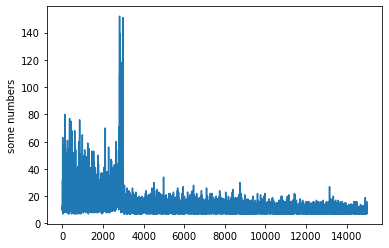

In [475]:
import matplotlib.pyplot as plt
plt.plot(episodes[:15000])
plt.ylabel('some numbers')
plt.show()

In [277]:
i = 0
while True:
    # action = env.action_space.sample()
    t = torch.tensor(observation)
    # print(ag.value_network(t))
    action = ag.select_action(observation)
    observation, reward, done, info = env.step(action)
    ag.consume_event(observation, reward, done)
    if i % 1000 == 0:
        print(i)
    if done:
        observation, info = env.reset(return_info=True)
        # print("Steps count: ", t)
        break
    i += 1
    if i > 1_000_000:
        print("Success!")
        break
t

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


tensor([-1.7153,  0.0227, -0.0033, -0.0326])